# **Bioinformatics - Computational Drug Discovery - Comparing Regressors**

Vaibhav Ramakrishnan & Thi Cam Tu Le

We will be comparing several ML algorithms for build regression models of aromatase inhibitors.


## **1. Import libraries**

In [1]:
! pip install lazypredict


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import sys
sys.executable

'/Users/vaibhavramakrishnan/miniconda/bin/python'

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [4]:
df = pd.read_csv('aromatase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [5]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [6]:
# Examine X dimension
X.shape

(2116, 881)

In [7]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(2116, 160)

In [8]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [9]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|████████████████████████████████████████████████████████████████████████████████████▉  | 41/42 [01:43<00:02,  2.63s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 1692, number of used features: 160
[LightGBM] [Info] Start training from score 6.060558


100%|███████████████████████████████████████████████████████████████████████████████████████| 42/42 [01:43<00:00,  2.48s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|████████████████████████████████████████████████████████████████████████████████████▉  | 41/42 [01:40<00:02,  2.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 1692, number of used features: 160
[LightGBM] [Info] Start training from score 6.060558


100%|███████████████████████████████████████████████████████████████████████████████████████| 42/42 [01:41<00:00,  2.41s/it]


In [13]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.77,0.79,0.60,0.55
DecisionTreeRegressor,0.77,0.79,0.60,0.03
ExtraTreeRegressor,0.77,0.79,0.60,0.03
ExtraTreesRegressor,0.77,0.79,0.60,1.41
XGBRegressor,0.75,0.78,0.62,0.30
RandomForestRegressor,0.72,0.75,0.66,1.19
BaggingRegressor,0.70,0.73,0.69,0.14
MLPRegressor,0.67,0.70,0.72,1.57
HistGradientBoostingRegressor,0.60,0.64,0.79,0.59


In [14]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
NuSVR,-0.16,0.28,1.11,0.21
SVR,-0.17,0.27,1.12,0.28
GradientBoostingRegressor,-0.20,0.26,1.13,0.49
HistGradientBoostingRegressor,-0.23,0.23,1.14,0.59
ElasticNetCV,-0.24,0.23,1.15,2.30
LassoCV,-0.24,0.23,1.15,2.10
BayesianRidge,-0.24,0.23,1.15,0.10
RidgeCV,-0.24,0.23,1.15,0.10
PoissonRegressor,-0.25,0.22,1.15,0.03


## **5. Data visualization of model performance**

[(0.0, 1.0)]

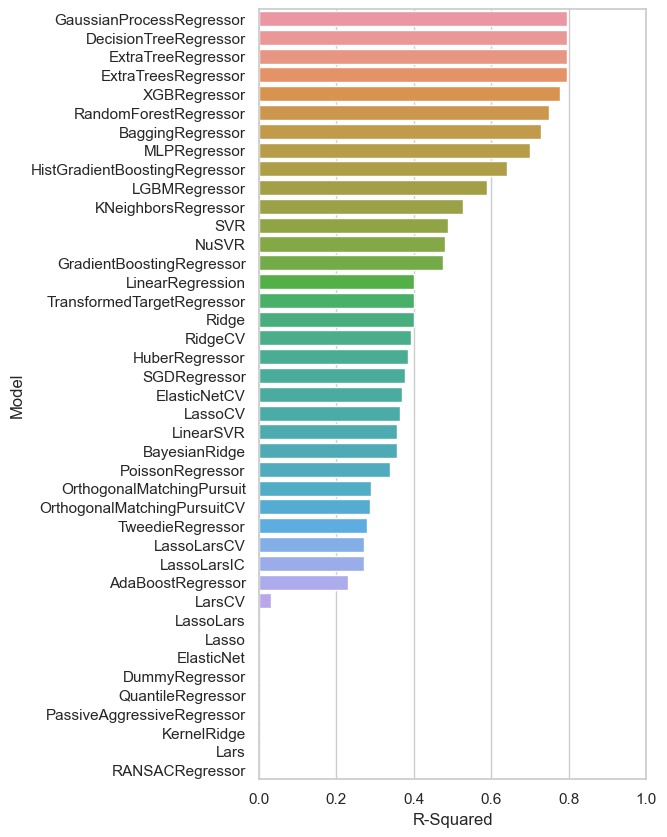

In [15]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

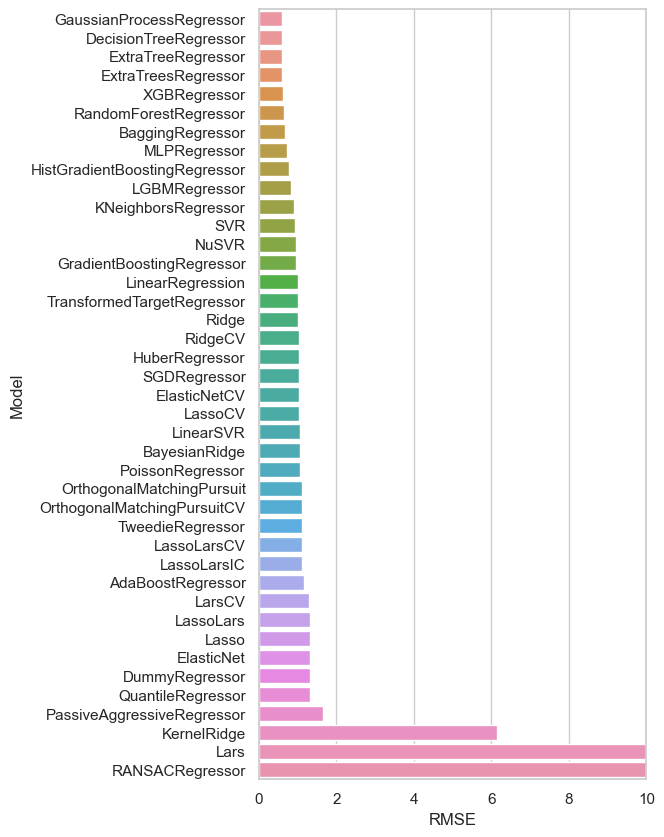

In [16]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

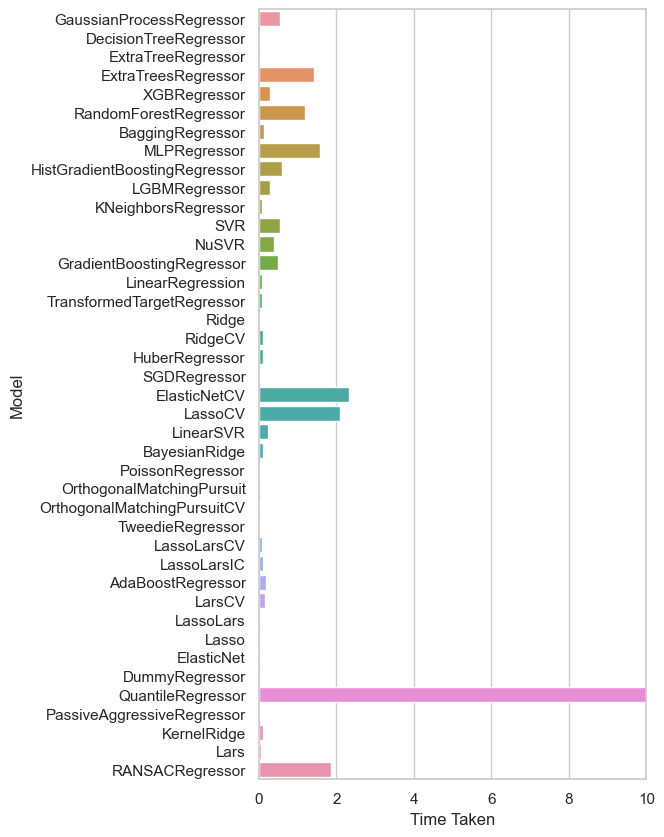

In [17]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 1.0)]

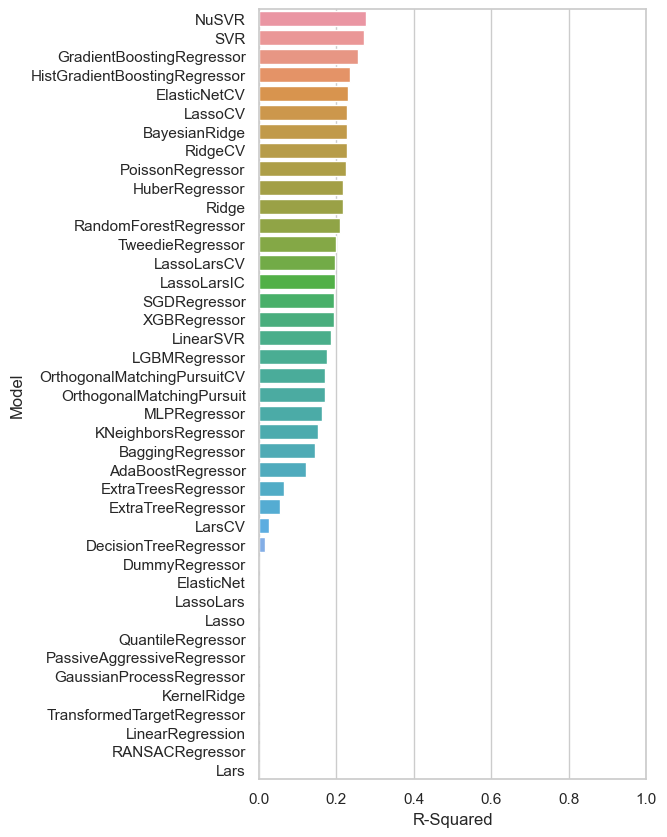

In [19]:
# Bar plot of R-squared values for test
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="R-Squared", data=predictions_test)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

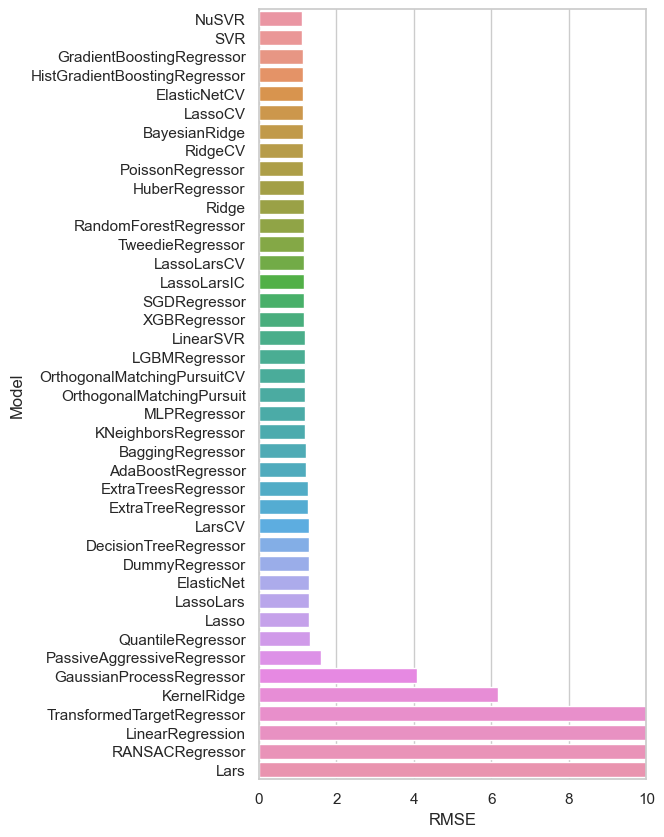

In [20]:
# Bar plot of RMSE values for test
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="RMSE", data=predictions_test)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

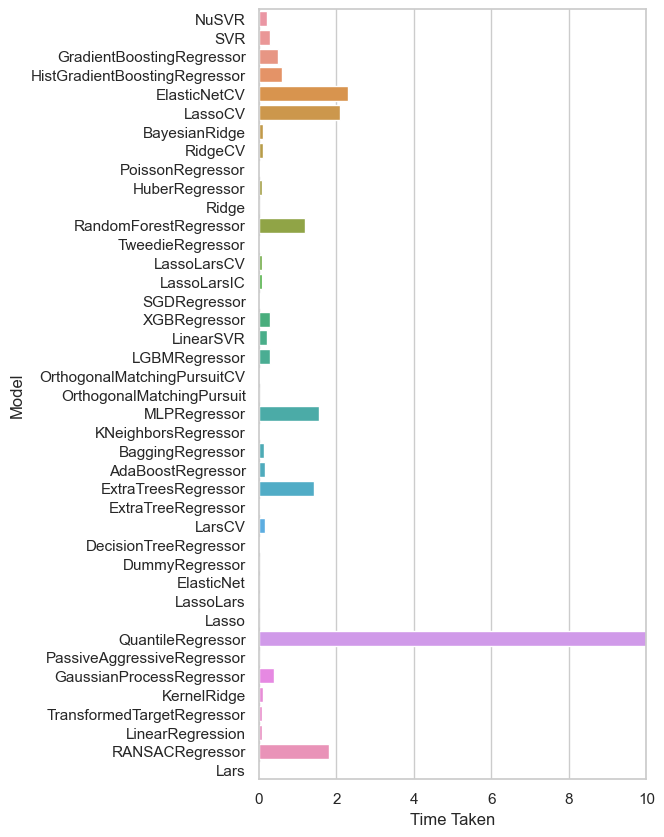

In [22]:
# Bar plot of calculation time for test
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="Time Taken", data=predictions_test)
ax.set(xlim=(0, 10))